# Convoluciones, ruido y filtrado

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

## $$G(x,y)=\sum_{i=-k}^{k}\sum_{j=-k}^{k}I(x+i,y+j)*w(k+i, k+j)$$

Donde k es el radio del kernel de convolución $w$, cuyo tamaño es cuadrado e **impar**.

In [2]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

El resultado de aplicar la convolución en img(1,1) es: 181


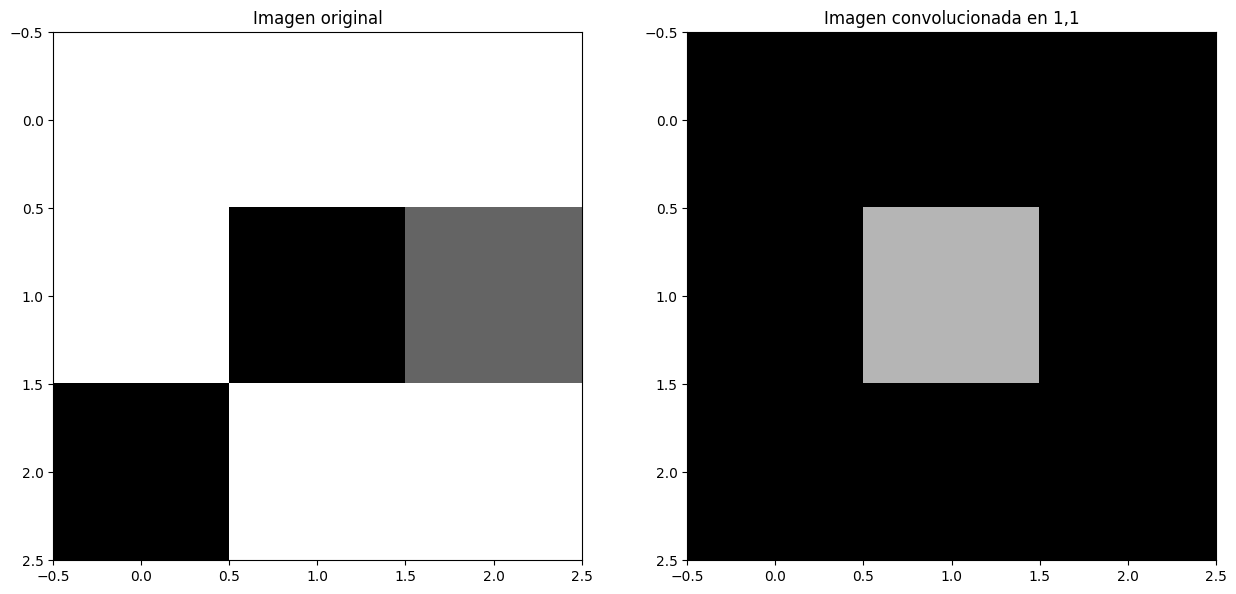

In [3]:
img = np.array([[255,255,255],
              [255,0,100],
              [0,255,255]], dtype=np.uint8)

x = 1
y = 1

w = np.array([[1/9,1/9,1/9],
              [1/9,1/9,1/9],
              [1/9,1/9,1/9]], dtype=np.float64)

k = 1 # El radio del kernel

res = np.zeros(img.shape, dtype=np.float64)

for i in range(-k, k+1):
    for j in range(-k, k+1):
        res[1][1] += img[x+i][y+j] * w[k+i][k+j]

res = res.astype(np.uint8)

print("El resultado de aplicar la convolución en img(1,1) es:", res[1][1])

fig, axs = plt.subplots(1,2, figsize=(15, 15))

axs[0].set_title('Imagen original')
axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)

axs[1].set_title('Imagen convolucionada en 1,1')
axs[1].imshow(res, cmap="gray", vmin=0, vmax=255)
plt.show()

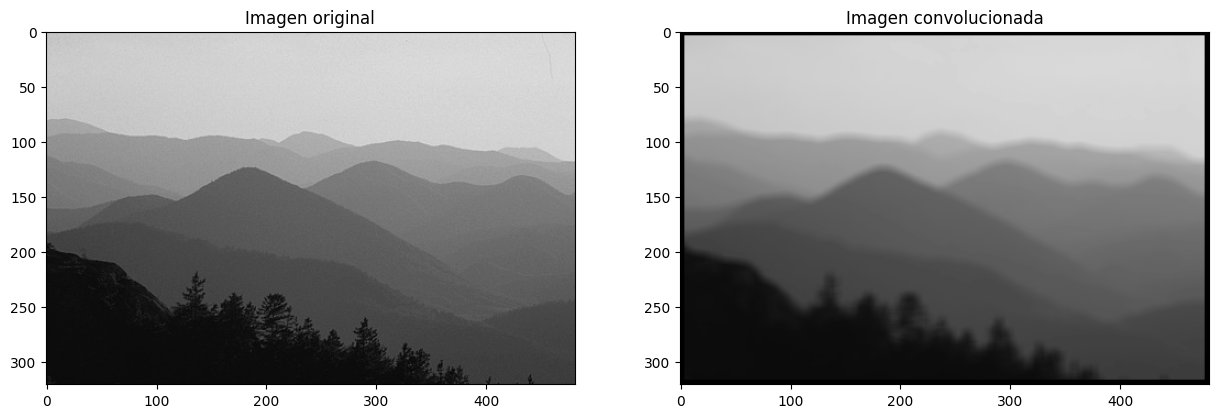

In [4]:
def make_kernel(size):
    kernel = np.ones((size,size),dtype=np.float64)
    r = math.floor(size/2)
    return (r,kernel/(size**2))

def apply_kernel(img, res, x, y, kernel, r):
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            # Esto funciona porque los arreglos/listas son pasados por referencia
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]

img = img_read('imagenes/mountains.jpg', 'gray')
k_size = 9

r, kernel = make_kernel(k_size)
img_convolucionada = np.zeros(img.shape, dtype=np.float64)

for i in range(r,img.shape[0]-r):
    for j in range(r, img.shape[1]-r):
        apply_kernel(img, img_convolucionada, i, j, kernel, r)

res = res.astype(np.uint8)

fig, axs = plt.subplots(1,2, figsize=(15, 15))

axs[0].set_title('Imagen original')
axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)

axs[1].set_title('Imagen convolucionada')
axs[1].imshow(img_convolucionada, cmap="gray", vmin=0, vmax=255)
plt.show()

In [5]:
# Porque funciona lo anterior
def change(casa):
    casa[3] = 'AAA'

hola = [0,1,2,3,4,5,6,7,8,9]
print(hola)
change(hola)
hola

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[0, 1, 2, 'AAA', 4, 5, 6, 7, 8, 9]

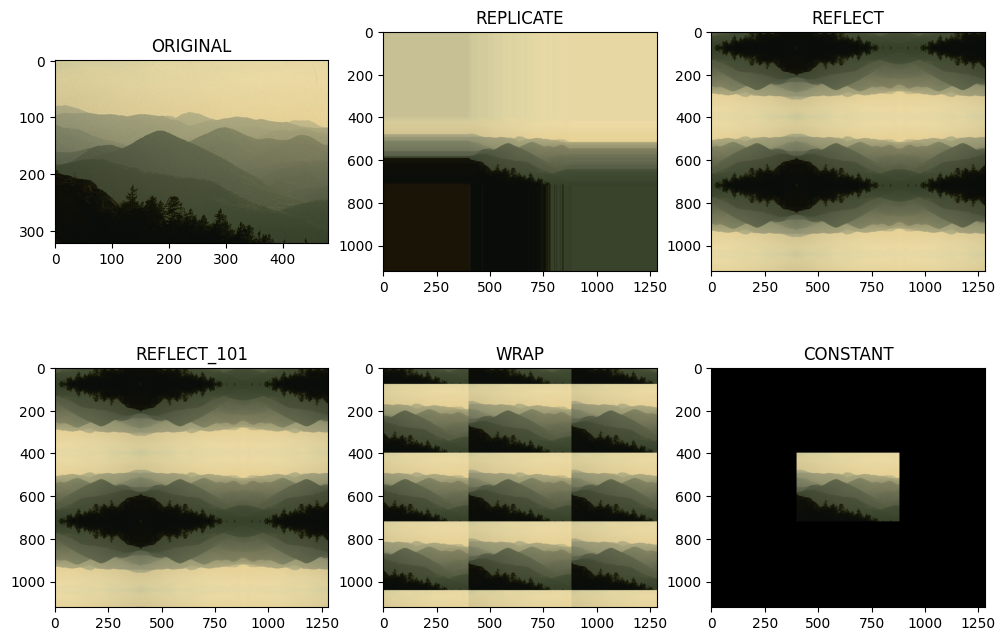

In [6]:
img = img_read('imagenes/mountains.jpg', 'color')

b_sz = 400

replicate = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,b_sz,b_sz,b_sz,b_sz,cv2.BORDER_CONSTANT,value=[0,0,0])

fig = plt.figure(figsize=(12,8))
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()


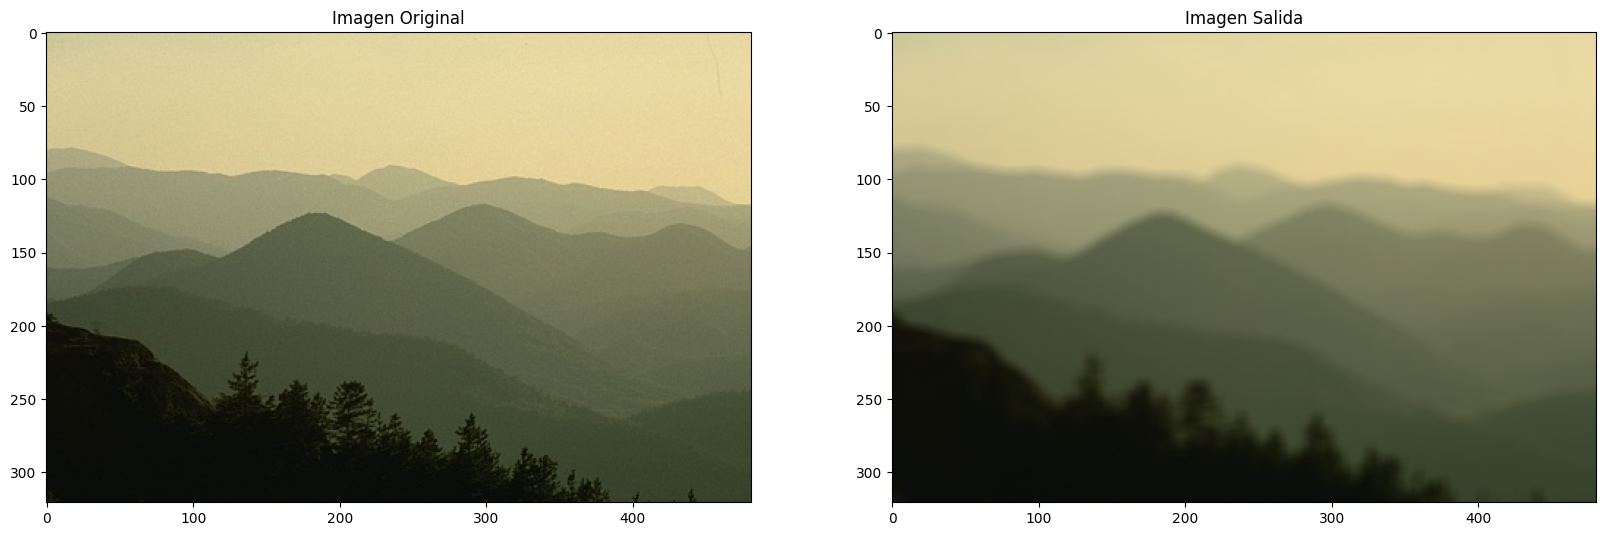

In [7]:
img = img_read('imagenes/mountains.jpg', 'color')

k_size = 9
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)

res = cv2.filter2D(img, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

fig = plt.figure(figsize=(20,24))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")
plt.show()

El ruido ***independiente*** puede ser descrito a menudo por un modelo de ruido aditivo, donde la imagen capturada $f(i,j)$ es la suma de la imagen verdadera $s(i,j)$ y el ruido $n(i,j)$. El ruido independiente a menudo tiene media cero y es descrito por su varianza $\sigma^2$. En muchos casos, el ruido aditivo se distribuye equitativamente en el dominio de la frecuencia. Abordaremos este fenómeno en la siguiente unidad.

## $$ f_{i,j} = s_{i,j} + n_{i,j} $$

El ruido ***deterministico*** suele describirse por medio de un modelo de ruido multiplicativo, donde la imagen capturada $f(i,j)$ es el producto de la imagen verdadera y el ruido $n(i,j)$:

## $$ f_{i,j} = s_{i,j} * n_{i,j} $$

## Formas básicas de medir el impacto del ruido

### - Proporción de señal a ruido (SNR: Signal-to-noise ratio)

El impacto del ruido sobre la imagen puede describirse como la proporción de señal a ruido (SNR), que está dada por:

### $$ SNR = \frac{\sigma_{s}^2}{\sigma_{n}^2} = \sqrt{ \frac{ \sigma_{f}^2}{\sigma_{n}^2}   - 1   } $$

Donde $\sigma_{s}^2$ es el ruido de la imagen ideal y $\sigma_{f}^2$ el ruido de la imagen capturada.

### - Error cuadrático medio (MSE: mean squared error)

El error cuadrático medio (MSE) mide el promedio de los errores, es decir, mide el promedio de los cuadrados de los errores. Es decir, mide la diferencia promedio cuadrada entre los valores aproximados y los reales.

### $$ MSE = \frac{ \sum_{i}^{M}{ \sum_{j}^{N}{ \sum_{k}^{C}{ (F_{i,j,k} - S_{i,j,k})^2 }  }  } }{M\cdot N \cdot C} $$

Donde $M$ es la cantidad de filas, $N$ es la cantidad de columnas, y $C$ la cantidad de canales de color.


### - Proporción máxima de señal a ruido (PSNR: Peak Signal-to-Noise Ratio)

La Proporción Máxima de Señal a Ruido o PSNR (del inglés Peak Signal-to-Noise Ratio) es un término utilizado en ingeniería para definir la relación entre la máxima energía posible de una señal y el ruido que afecta a su representación fidedigna. Debido a que muchas señales tienen un gran rango dinámico, el PSNR se expresa generalmente en escala logarítmica, utilizando como unidad el decibelio.

El uso más habitual del PSNR es como medida cuantitativa de la calidad de la reconstrucción en el ámbito de la compresión de imágenes. Para definirla se hace indispensable la formulación del error cuadrático medio.

### $$ PSNR = 20 \cdot \log_{10}{\frac{MAX_I}{\sqrt{MSE}}}  $$

Donde $MAX_I$ denota el máximo valor que puede tomar un píxel en la imagen. Cuando éstos se representan usando $B$ bits por muestra, $MAX_I = 2^B - 1$. En el caso de una imagen de 8 bits, el valor de $MAX_I$ sería 255.



## TIPOS DE RUIDO


### - Ruido Gaussiano

El Ruido Gaussiano (o normal) modela el ruido producido por los circuitos electrónicos o ruido de los sensores por falta de iluminación y/o altas temperaturas. Un ejemplo de este tipo de ruido es el provocado en el revelado de las películas.

El ISO de una cámara también tiene un impacto notorio sobre las imágenes que se toman con esta. Por esto es uno de los parámetros más importantes a registrar al momento de llevar a cabo la adquisición.

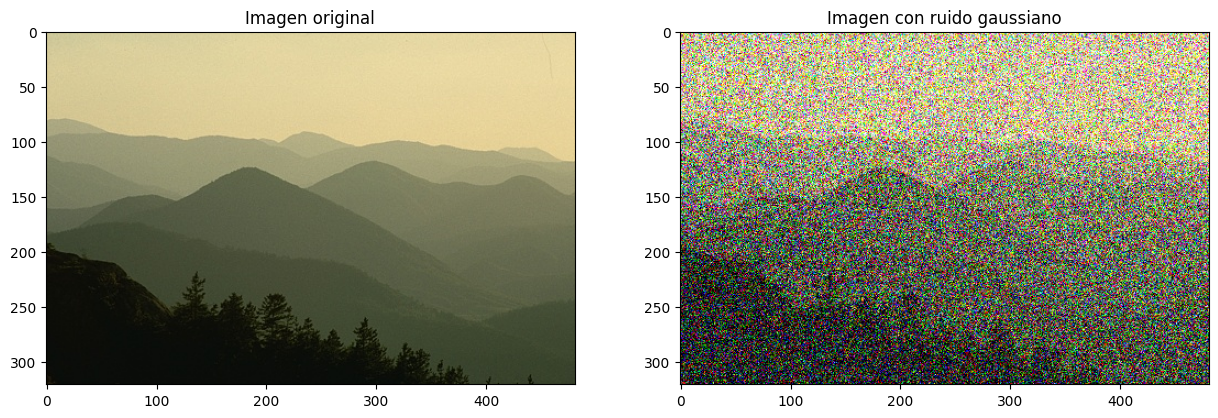

In [8]:
def gaussian_noise(img, std = 0.02):
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1
    noisy = np.zeros(img.shape, np.float64)
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    noisy =  img + gauss
    noisy[noisy < 0] = 0
    noisy[noisy > 255] = 255
    return noisy

std = 100
img = img_read('imagenes/mountains.jpg', 'color')

res = gaussian_noise(img, std)
res = res.astype(np.uint8)

fig, axs = plt.subplots(1,2, figsize=(15, 15))

axs[0].set_title('Imagen original')
axs[0].imshow(img)

axs[1].set_title('Imagen con ruido gaussiano')
axs[1].imshow(res)
plt.show()

In [9]:
# :o
num = 5
casa = 'sizas' if num > 5 else 'nada'
casa

'nada'

### - Ruido impulsivo o de sal y pimienta

El ***Ruido Impulsivo*** (o Sal y Pimienta) se produce normalmente en la cuantificación que se realiza en el proceso de digitalización y es muy común en la transmisión. Los píxeles corrompidos son colocados ya sea como el máximo valor (que luce como nieve en imagenes a escala de grises) o tienen bits individuales cambiados de valor. En algunos casos, los pixeles se establecen de forma alternada como 0 o como el valor máximo, dándole a la imagen una apariencia de 'sal y pimienta'. Los píxeles que no se ven afectados se mantienen igual.
Defectos que contribuyen a este tipo incluyen un CCD defectuoso, que realizará una captura errónea. El ruido normalmente está cuantificado por el porcentaje de píxeles (o sensores) que están corrompidos.

[array([ 55,   5, 144, ...,  84, 301, 155]), array([195, 152, 125, ...,  65, 112, 257])]


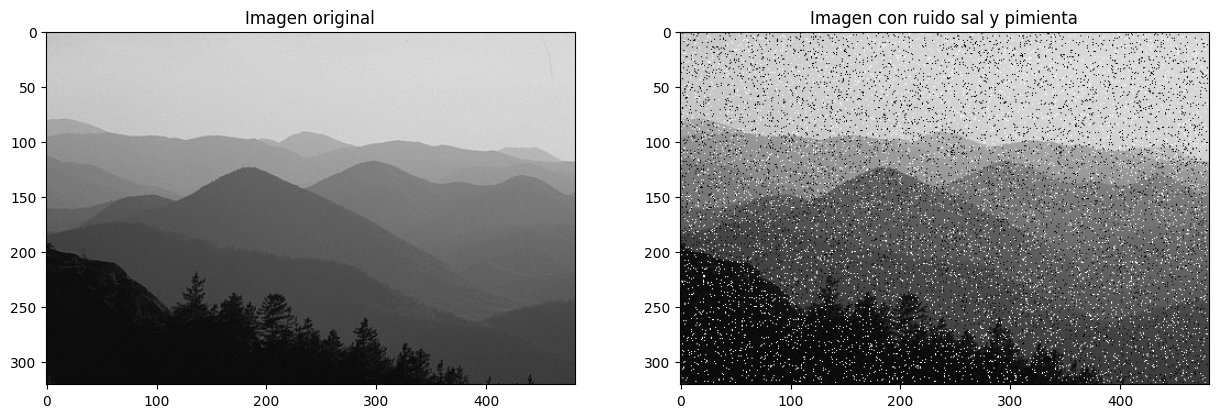

In [112]:
def sp_noise(img, s_vs_p = 0.5, amount = 0.004):
    noisy = img.copy()

    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in img.shape]
    noisy[coords[0], coords[1]] = 255
    print(coords)

    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))

    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in img.shape]
    noisy[coords[0], coords[1]] = 0
    return noisy

s_vs_p = 0.5
amount = 0.1

img = img_read('imagenes/mountains.jpg', 'gray')
res = sp_noise(img, s_vs_p, amount)
res = res.astype(np.uint8)

fig, axs = plt.subplots(1,2, figsize=(15, 15))

axs[0].set_title('Imagen original')
axs[0].imshow(img, cmap="gray", vmin=0, vmax=255)

axs[1].set_title('Imagen con ruido sal y pimienta')
axs[1].imshow(res, cmap="gray", vmin=0, vmax=255)
plt.show()

In [98]:
img = img_read('imagenes/mountains.jpg', 'gray')
img

array([[189, 195, 193, ..., 216, 218, 214],
       [191, 196, 196, ..., 216, 218, 212],
       [192, 196, 196, ..., 216, 214, 216],
       ...,
       [ 19,  10,  16, ...,  58,  61,  62],
       [ 10,  14,  30, ...,  58,  61,  59],
       [ 20,  20,  29, ...,  57,  55,  61]], dtype=uint8)

In [107]:
img[[1,2,5,6,3,2,5],[2,0,6,3,4,5,6]]

array([196, 192, 197, 194, 199, 199, 197], dtype=uint8)